# Project 1, Part 5, Data Visualization



# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    

In [3]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# 1.5 Example of a Data Visualization created using Python

The data science team would like for you to create an example of a data visualization using Python from data in a Pandas dataframe containing data from an SQL query.

Write 1 and only 1 query.  Note that the query may have as many subqueries, including "with" clauses, as you wish.  Any query of your choosing.  You can write a query from scratch.  You can use a query from a previous problem in this project.  You can use a query from the labs.  The idea is to come up with a query whose resulting data will make for an excellent quality data visualization. 

Ensure that when you check this Juptyer Notebook into GitHub that the query results in the Pandas dataframe are clearly visible in GitHub.  Note: When a query result has a large number of rows, Pandas will only display the first 5 rows, a row with ellipses, and the last 5 rows. This is ok.

Once you have the data in a Pandas dataframe, you may write as much Python code and use as many code cells as you wish to produce the data visualization.

You may only use Python modules that are currently installed in the Anaconda Docker container.  You may not install additional modules or any other software.

All work must be done in Docker in your VM in AWS.  You may not use any external data visualization systems, such as Tableau, etc.

You may use any code from the labs to pattern your code after, however for the data visualization, you cannot wholesale copy a data visualization from the labs.

Ensure that it is properly titled, including titles for axes if present.

Ensure that when you check this Juptyer Notebook into GitHub that the data visualization is clearly visible.  

If you want to use Google Maps for your data visualization, this is fine, however, the image will not show up in GitHub.  So, just save the image to an image file, include it in the repo, and add a markdown cell to display the image file. Also with Google Maps, do NOT check gmap_api_key.txt into GitHub for security reasons.  If the grader needs to run it, they will supply their own gmap_api_key.txt.


In [24]:
rollback_before_flag = True
rollback_after_flag = True

query = """

SELECT
    sa.sale_date,
    EXTRACT(DOW FROM sa.sale_date) AS dow,
    TO_CHAR(sa.sale_date, 'Day') AS day_of_week,
    EXTRACT(MONTH FROM sa.sale_date) AS month_number,
    TO_CHAR(sa.sale_date, 'Month') AS month,
    p.description AS meal_name,
    SUM(l.quantity) AS total_meals_purchased,
    ROUND(SUM(sa.total_amount),2) AS actual_sales_dollars,
    st.city AS store_name,
    st.latitude AS latitude,
    st.longitude AS longitude
FROM sales sa
LEFT JOIN stores st
    ON st.store_id = sa.store_id
LEFT JOIN line_items l
    ON (l.store_id = sa.store_id) AND (l.sale_id = sa.sale_id)
LEFT JOIN products p
    ON p.product_id = l.product_id

GROUP BY sale_date, day_of_week, month, store_name, meal_name, latitude, longitude
ORDER BY 
    sale_date ASC,
    actual_sales_dollars DESC
    
"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,sale_date,dow,day_of_week,month_number,month,meal_name,total_meals_purchased,actual_sales_dollars,store_name,latitude,longitude
0,2020-01-01,3,Wednesday,1,January,Pistachio Salmon,684,28788,Berkeley,37.8555,-122.2604
1,2020-01-01,3,Wednesday,1,January,Eggplant Lasagna,574,27048,Berkeley,37.8555,-122.2604
2,2020-01-01,3,Wednesday,1,January,Curry Chicken,476,24360,Berkeley,37.8555,-122.2604
3,2020-01-01,3,Wednesday,1,January,Pistachio Salmon,519,22740,Seattle,47.6114,-122.3214
4,2020-01-01,3,Wednesday,1,January,Teriyaki Chicken,392,21468,Berkeley,37.8555,-122.2604
...,...,...,...,...,...,...,...,...,...,...,...
14555,2020-12-31,4,Thursday,12,December,Chicken Salad,172,12948,Berkeley,37.8555,-122.2604
14556,2020-12-31,4,Thursday,12,December,Chicken Salad,140,10740,Seattle,47.6114,-122.3214
14557,2020-12-31,4,Thursday,12,December,Chicken Salad,123,8700,Miami,25.7720,-80.1891
14558,2020-12-31,4,Thursday,12,December,Chicken Salad,104,7440,Nashville,36.1568,-86.7881


In [5]:
import matplotlib.pyplot as plt

In [6]:
# Explore the dataset
print(df['meal_name'].describe())
print(df['meal_name'].value_counts())

count                14640
unique                   8
top       Pistachio Salmon
freq                  1830
Name: meal_name, dtype: object
Pistachio Salmon     1830
Eggplant Lasagna     1830
Curry Chicken        1830
Teriyaki Chicken     1830
Brocolli Stir Fry    1830
Tilapia Piccata      1830
Spinach Orzo         1830
Chicken Salad        1830
Name: meal_name, dtype: int64


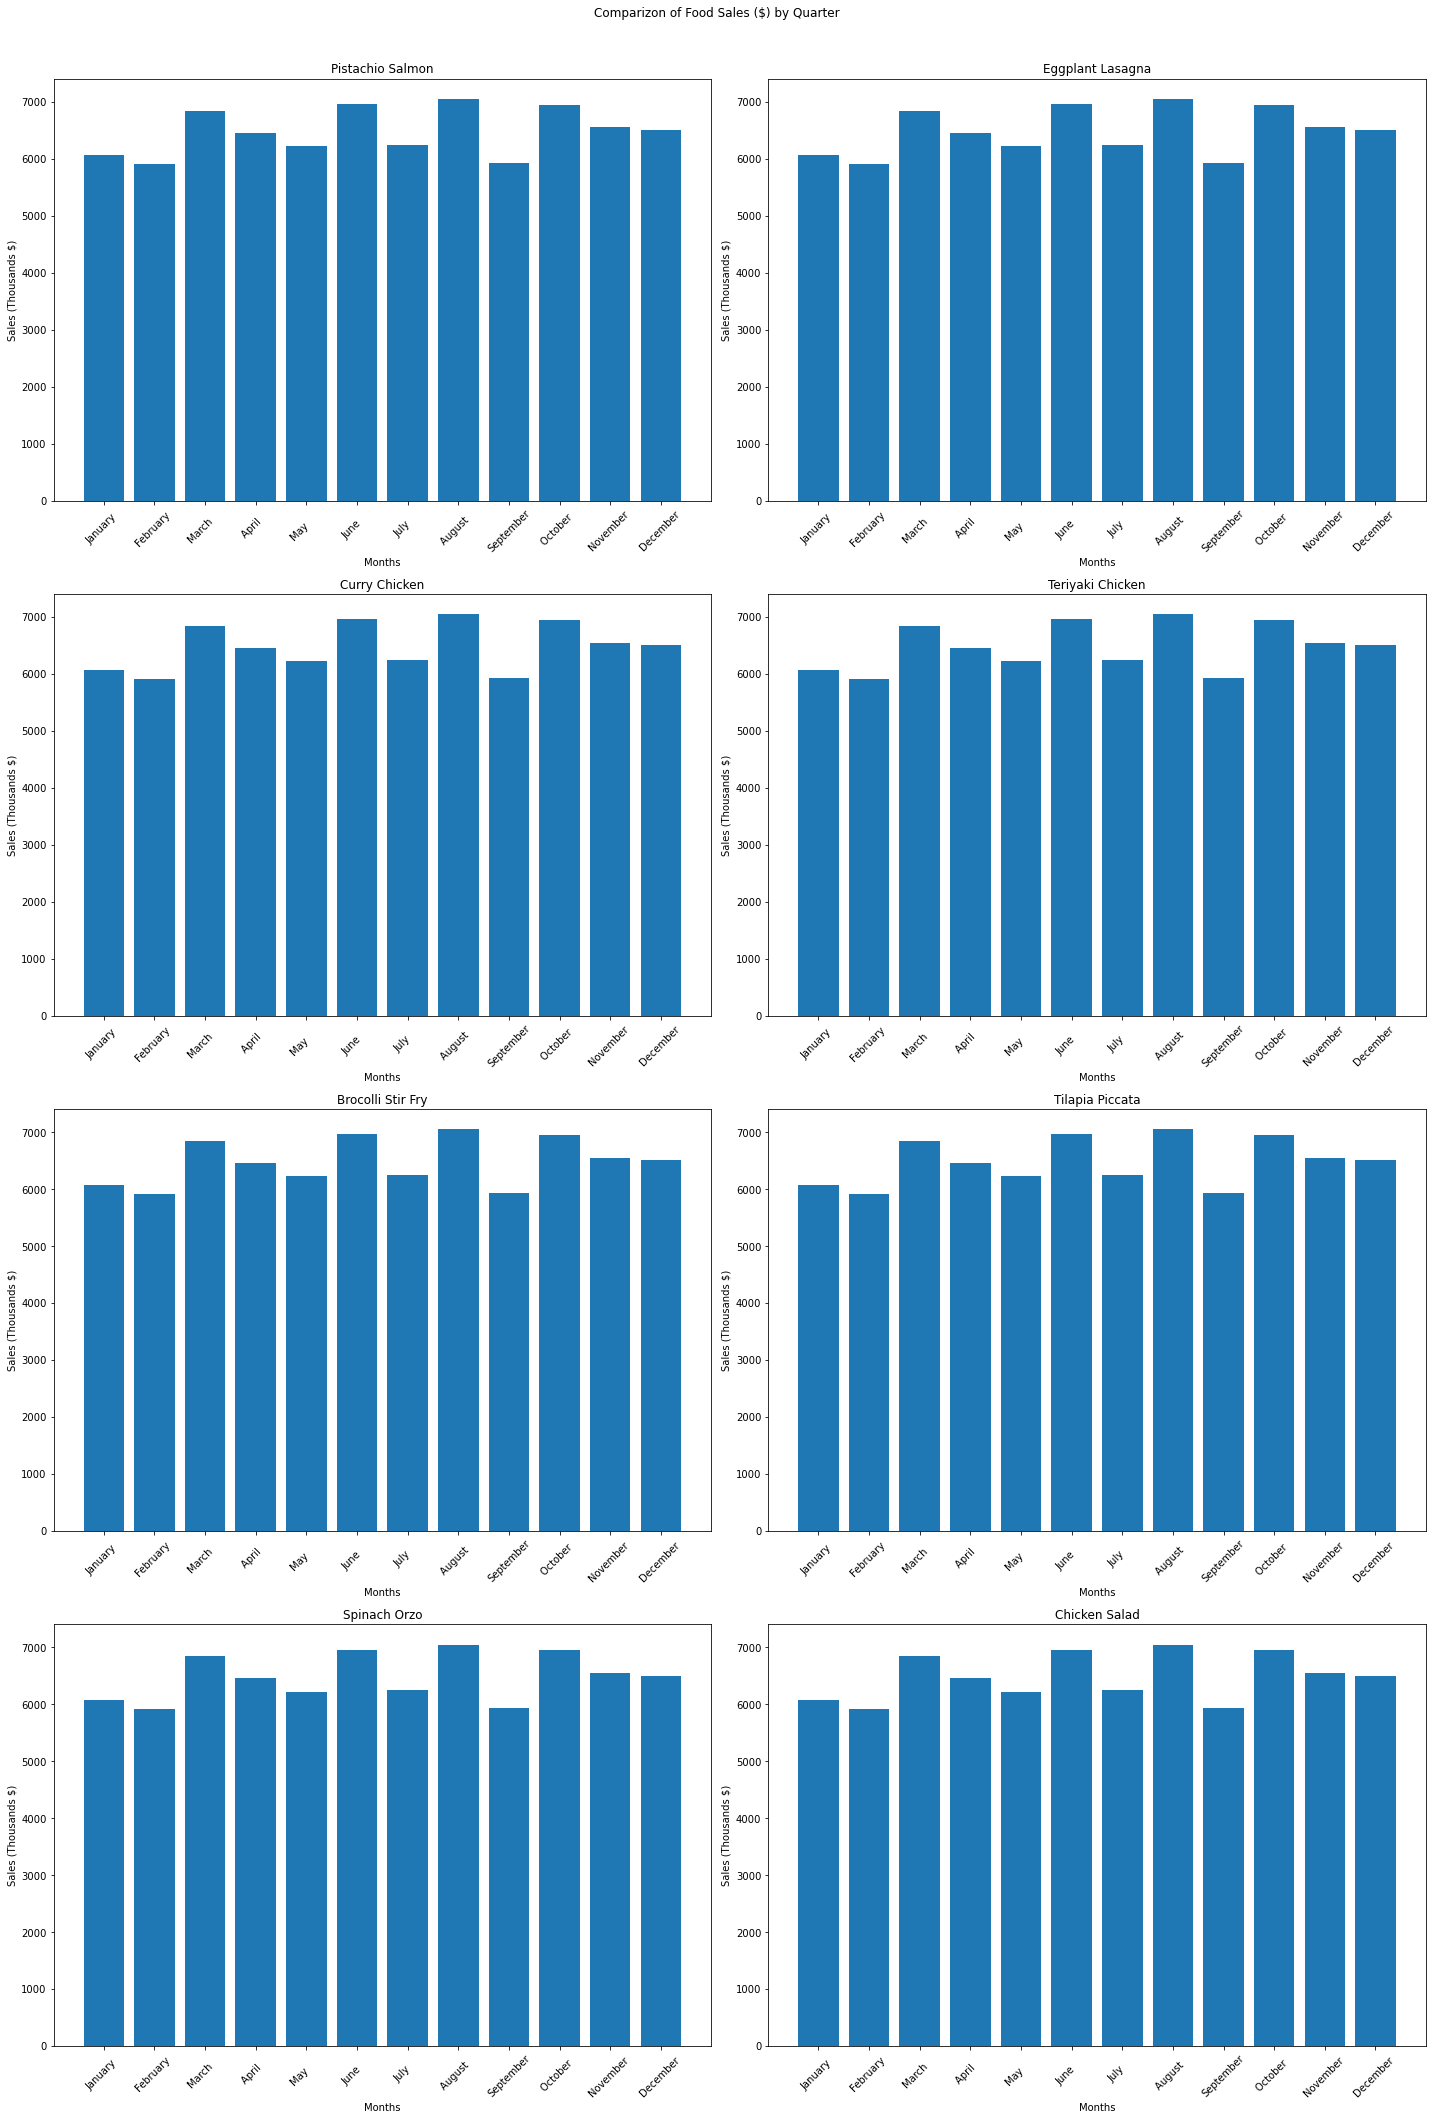

In [7]:
# Use as many code cells as you need to create and display your data visualization
# Annual sales (dollar amount) of each type of food by months
by_month = df.groupby(['month', 'month_number', 'meal_name'], as_index =False)['actual_sales_dollars'].sum()
by_month = by_month.sort_values('month_number')
by_month

fig, ax = plt.subplots(4,2,figsize=(20,30))
fig.suptitle('Comparizon of Food Sales ($) by Quarter')

foods = df['meal_name'].unique()
months = [['January','February','March'], ['April','May','June'], ['July','August','September'], ['October','November','December']]
quarters = ['1st Quarter', '2nd Quarter', '3rd Quarter', '4th Quarter']

t = 0

for i in range(4):
    for j in range(2):
        ax[i][j].bar(by_month['month'], by_month['actual_sales_dollars']/1000)
        ax[i][j].set_title(foods[t])
        ax[i][j].set_xlabel('Months')
        ax[i][j].set_ylabel('Sales (Thousands $)')
        ax[i][j].tick_params(axis='x', rotation=45)
        t += 1

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to make room for the suptitle
plt.show()
    

In [8]:
# Mapping sales of food by location - heatmap
import json

import gmaps
import gmaps.geojson_geometries

from geographiclib.geodesic import Geodesic

f = open('gmap_api_key.txt', 'r')
my_api_key = f.read()
f.close()

gmaps.configure(api_key=my_api_key)


In [9]:
# #df_heatmap = df.groupby(['meal_name', 'store_name', 'latitude', 'longitude'], as_index =False)['actual_sales_dollars'].sum()

center_of_us = (39.8282, -98.5796)
fig = gmaps.figure(center=center_of_us, zoom_level=4)

df_markers = df.groupby(['meal_name', 'store_name', 'latitude', 'longitude'], as_index =False)['actual_sales_dollars'].sum()

info_box_template = """
<dl>
<dt>Location</dt><dd>{store_name}</dd>
<dt>Meal Name</dt><dd>{meal_name}</dd>
<dt>Actual Sales ($)</dt><dd>{actual_sales_dollars}</dd>
</dl>
"""
info = [info_box_template.format(**row) for index, row in df_markers.iterrows()]
marker_layer = gmaps.marker_layer(df_markers[['latitude', 'longitude']], info_box_content=info)

fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [67]:
df_heatmap['store_name'].value_counts()

Berkeley     8
Dallas       8
Miami        8
Nashville    8
Seattle      8
Name: store_name, dtype: int64

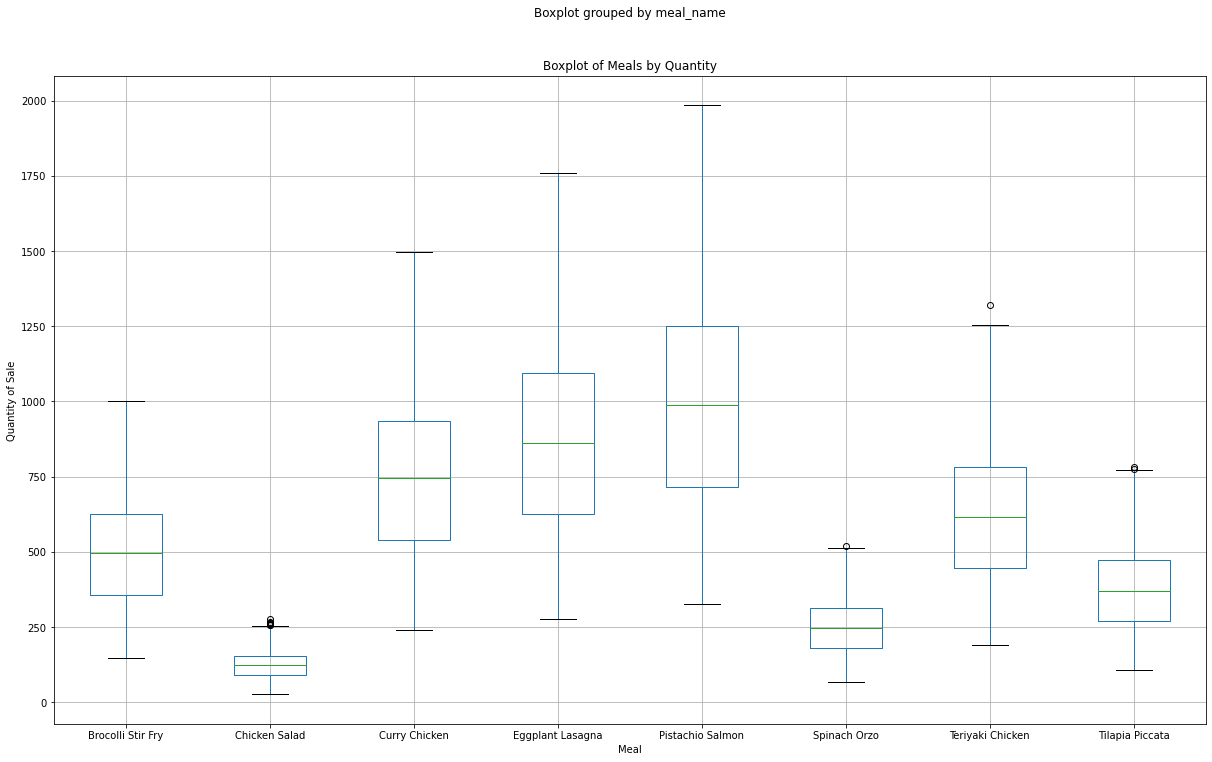

In [27]:
# Plot subfigures to show the number of meals purchased per week for different foods. (box plot by days of week)

df.boxplot(by='meal_name', column=['total_meals_purchased'], figsize=(20,12))

plt.title('Boxplot of Meals by Quantity')
plt.xlabel('Meal')
plt.ylabel('Quantity of Sale')
plt.show()